# A. Cài đặt thư viện

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter

# B. Phân tích và trực quan hóa dữ liệu

In [39]:
trending_videos = pd.read_csv('Data/trending_videos.csv', index_col=False)
trending_videos_unique = pd.read_csv('Data/trending_videos_unique.csv', index_col=False)

## 1. Phân tích tổng quan

### 1.1. Thời điểm đăng trong ngày của video

In [40]:
upload_time = trending_videos_unique[['published_at']].copy()
upload_time['published_at'] = pd.to_datetime(upload_time['published_at'])
upload_time['hour'] = upload_time['published_at'].dt.hour
time_ranges = []
video_counts = []
for i in range(24):
    time_ranges.append(f'{i}h - {i+1}h')
    video_counts.append(upload_time[(upload_time['hour'] >= i) & (upload_time['hour'] < i+1)].shape[0])

time_video_df = pd.DataFrame({'Time Range': time_ranges, 'Video Count': video_counts})

In [41]:
time_video_df

,Time Range,Video Count
0,0h - 1h,66
1,1h - 2h,33
2,2h - 3h,22
3,3h - 4h,24
4,4h - 5h,36
5,5h - 6h,26
6,6h - 7h,17
7,7h - 8h,19
8,8h - 9h,36
9,9h - 10h,60


In [42]:
fig = px.box(upload_time, 
       x='hour', 
       title='Box Plot of Video Upload Times')
fig.update_xaxes(tickmode='linear', dtick=1)
fig.show()

In [43]:
fig = px.bar(time_video_df, 
             x='Time Range', 
             y='Video Count', 
             title='Number of Videos Uploaded in Each Time Range')
fig.show()

### 1.2. Thời gian video tồn tại trên trending

In [44]:
time_on_trending = trending_videos_unique[['trending_time']].copy()
time_on_trending['trending_time'] = pd.to_timedelta(time_on_trending['trending_time'])
time_on_trending['trending_time'] = time_on_trending['trending_time'].dt.days
time_on_trending = time_on_trending.groupby('trending_time').size()
time_on_trending = time_on_trending.reset_index(name='count')

In [45]:
time_on_trending

,trending_time,count
0,1,150
1,2,138
2,3,150
3,4,186
4,5,196
5,6,203
6,7,230
7,8,197
8,9,175
9,10,155


In [46]:
fig = px.box(time_on_trending, 
       x='trending_time',
       labels={'trending_time':'Trending time'},
       title='Box plot of time on trending')
fig.update_xaxes(tickmode='linear', dtick=1)
fig.show()

In [47]:
fig = px.bar(time_on_trending,
             x='trending_time', 
             y='count',
             labels={'trending_time':'Days','count':'Videos'},
             title='Bar plot trending time')
fig.update_xaxes(tickmode='linear', dtick=1)
fig.show()

## 2. Phân tích theo từ khóa

In [48]:
video_tags = trending_videos_unique['video_tags'].copy()
video_tags = video_tags.dropna()
tags_list = []
for tagline in video_tags:
    tags_list.extend(tagline.split(','))
count_tags = Counter(tags_list)
tags_df = pd.DataFrame(count_tags.items(),columns=['tag','count'])
tags_df_sort = tags_df.sort_values('count',ascending=True).tail(25)

In [49]:
tags_df_sort

,tag,count
518,小舞,60
358,garena,61
352,garena liên quân,61
353,liên quân mobile,61
356,garena liên quân mobile,61
357,aov,61
354,liên quân,62
14,tiktok 2024,63
784,phim ngắn,66
360,Esports,72


In [50]:
px.bar(tags_df_sort,
       x='count', 
       y='tag', 
       title='Top 25 Tags by Count',
       height=600,width=800)

## 3. Phân tích theo chủ đề

### 3.1.	Phần trăm từng chủ đề trên trending

In [51]:
category_counts = trending_videos['category'].copy().value_counts()
category_full = category_counts.reset_index()

In [52]:
category_full

,category,count
0,Entertainment,7103
1,People & Blogs,5445
2,Music,1439
3,Gaming,1266
4,Comedy,830
5,Sports,665
6,Howto & Style,562
7,News & Politics,504
8,Film & Animation,480
9,Pets & Animals,273


In [53]:
threshold = 550
category_pie = category_full.copy()
category_pie['category'] = category_pie['category'].apply(lambda x: x if category_counts[x] >= threshold else 'Others')
category_pie = category_pie.groupby('category').sum().reset_index()

In [54]:
px.pie(category_pie, values='count', names='category', title='Percent of categories')

### 3.2. Trung bình lượt tương tác theo chủ đề

In [55]:
pd.options.display.float_format = None
general_category = trending_videos[['category', 'view_count', 'like_count', 'comment_count']].copy()
general_category = general_category.groupby('category').mean().reset_index()
general_category['like_to_view'] = (general_category['like_count'] / general_category['view_count']) * 100
general_category['comment_to_view'] = (general_category['comment_count'] / general_category['view_count'])* 100

In [56]:

general_category.drop(['view_count', 'like_count', 'comment_count'], axis=1, inplace=True)
general_category

,category,like_to_view,comment_to_view
0,Autos & Vehicles,1.943026,0.010966
1,Comedy,1.819106,0.004452
2,Education,1.015546,0.004803
3,Entertainment,2.844999,0.033654
4,Film & Animation,4.304688,0.008321
5,Gaming,3.675919,0.015511
6,Howto & Style,1.758414,0.002427
7,Music,3.158901,0.240601
8,News & Politics,1.429703,0.031810
9,People & Blogs,2.261177,0.010949


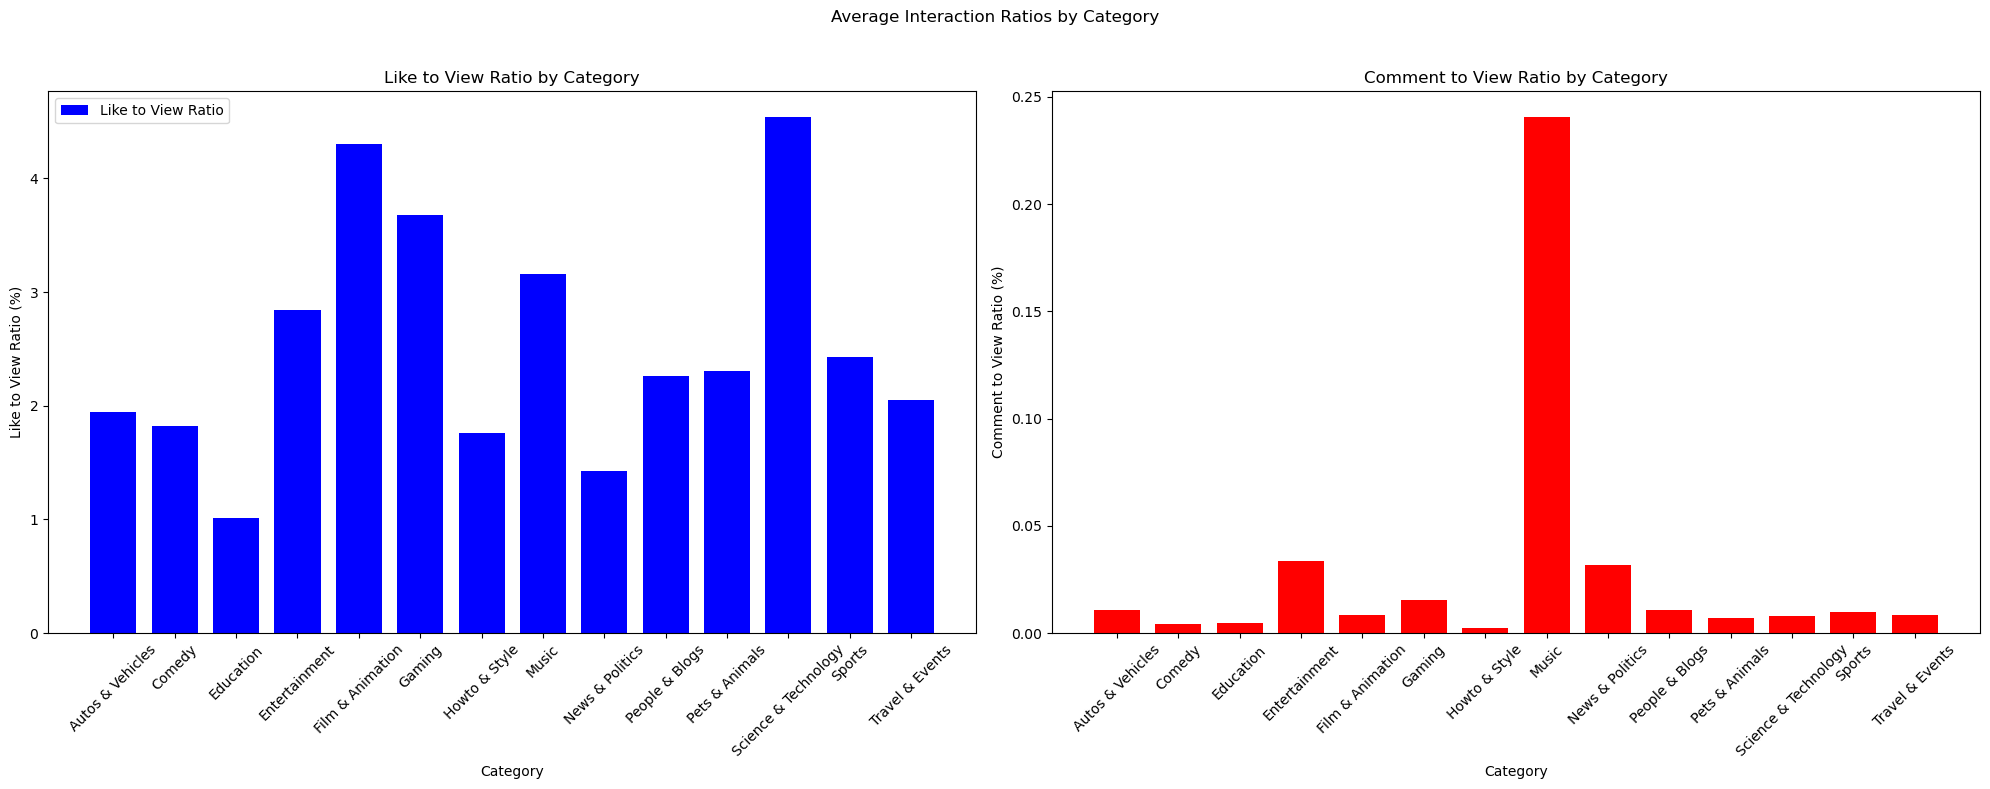

In [57]:
x = range(len(general_category['category']))
width = 0.75
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axes[0].bar(x, general_category['like_to_view'], width=width, label='Like to View Ratio', color='b')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Like to View Ratio (%)')
axes[0].set_xticks(x)
axes[0].set_xticklabels(general_category['category'], rotation=45)
axes[0].tick_params(axis='y')
axes[0].set_title('Like to View Ratio by Category')
axes[0].legend()

axes[1].bar(x, general_category['comment_to_view'], width=width, label='Comment to View Ratio', color='r')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Comment to View Ratio (%)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(general_category['category'], rotation=45)
axes[1].tick_params(axis='y')
axes[1].set_title('Comment to View Ratio by Category')

plt.suptitle('Average Interaction Ratios by Category')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 3.3. Thời gian tồn tạo trung bình trên trending theo chủ đề

In [58]:
pd.options.display.float_format = '{:,.0f}'.format
trending_category = trending_videos_unique[['category', 'trending_time']].copy()
trending_category['trending_time'] = pd.to_timedelta(trending_category['trending_time'])
trending_category = trending_category.groupby('category').mean()
trending_category = trending_category / np.timedelta64(1, 'h')
trending_category = trending_category.reset_index()
trending_category = trending_category.sort_values('trending_time')

In [59]:
trending_category

,category,trending_time
12,Sports,140
8,News & Politics,151
5,Gaming,156
4,Film & Animation,165
6,Howto & Style,169
1,Comedy,173
11,Science & Technology,181
9,People & Blogs,186
2,Education,202
3,Entertainment,205


In [60]:
px.bar(trending_category, 
       x='trending_time', 
       y='category', 
       labels={'category': 'Category', 'trending_time': 'Average Trending Time (hours)'}, 
       title='Average Trending Time by Category')

## 4. Phân tích theo thời gian

### 4.1. Thời lượng của video trending theo thời gian

In [61]:
duration_videos = trending_videos[['snapshot_date', 'duration']].copy()
duration_videos['week'] = pd.to_datetime(duration_videos['snapshot_date']).dt.to_period('W')
bins = [pd.Timedelta(minutes=0), pd.Timedelta(minutes=1), pd.Timedelta(minutes=10), pd.Timedelta(minutes=60), pd.Timedelta(hours=24)]
labels = ['<1p', '1-10p', '10-60p', '>60p']
duration_videos['duration_time'] = pd.cut(duration_videos['duration'], bins=bins, labels=labels, right=False)
duration_videos = duration_videos.groupby(['week', 'duration_time'], observed=False).size().unstack(fill_value=0)
duration_videos = duration_videos.reset_index()

In [62]:
for col in duration_videos.columns[1:]:
    duration_videos[col] = duration_videos[col].cumsum()
    
duration_videos['week'] = duration_videos['week'].astype(str)
duration_videos_long = duration_videos.melt(id_vars='week', 
											var_name='time', 
											value_name='count')
fig = px.bar(duration_videos_long, 
             x='count', 
             y='time',
             orientation='h', 
             color='time', 
             animation_frame='week', 
             title='Video Duration Over Time',
             labels={'count': 'Number of Videos', 'time': 'Duration Range', 'week': 'Week'},
             text='count')
fig.show()

### 4.2. Chủ đề của video trending theo thời gian

In [63]:
video_counts = 300
category_area = trending_videos[['snapshot_date', 'category']].copy()
category_area['category'] = category_area['category'].apply(lambda x: x if category_counts[x] >= video_counts else 'Others')
category_area = category_area.groupby(['snapshot_date', 'category']).size().unstack(fill_value=0)
category_area.index = pd.to_datetime(category_area.index)
category_area['month'] = category_area.index.to_period('W')
category_area = category_area.groupby('month').sum()
category_area = category_area.reset_index()

In [64]:
for col in category_area.columns[1:]:
    category_area[col] = category_area[col].cumsum()

In [65]:
category_area['month'] = category_area['month'].astype(str)
category_area_long = category_area.melt(id_vars='month', 
                                        var_name='categories', 
                                        value_name='count')
category_area_long = category_area_long.sort_values(by=['month', 'count'], ascending=[True, False])

fig = px.bar(
    category_area_long,
    x='count', 
    y='categories',
    orientation='h', 
    color='categories', 
    animation_frame='month', 
    title='Video Category Over Time',
    labels={
        'count': 'Number of Videos', 
        'categories': 'Category', 
        'month': 'Month'
    },
    text='count',
)
category_area_long['categories'] = pd.Categorical(category_area_long['categories'], 
                                                  categories=category_area_long.groupby('categories')['count'].sum().sort_values(ascending=False).index)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis={'categoryorder':'total ascending'},
    xaxis=dict(
        title='Number of Videos', 
        tickangle=0,  
        side='top'  
    )
)
fig.update_layout(showlegend=False)

fig.show()

### 4.3.	Trung bình lượt tương tác của từng chủ đề theo thời gian

In [66]:
pd.options.display.float_format = '{:,.0f}'.format

general_videos = trending_videos[["view_count", "like_count", "comment_count"]].copy()
general_videos.describe()

,view_count,like_count,comment_count
count,"18,993","18,993","18,993"
mean,"17,326,301","454,631","5,202"
std,"30,603,966","1,029,071","23,578"
min,"187,782",0,0
25%,"1,747,721","29,822",138
50%,"3,598,797","66,194",437
75%,"18,896,138","341,314","2,209"
max,"300,392,468","11,040,218","438,822"


In [67]:
general_month = trending_videos[["snapshot_date", "view_count", "like_count", "comment_count"]].copy()
general_month['snapshot_date'] = pd.to_datetime(general_month['snapshot_date'])
general_month['snapshot_date'] = general_month['snapshot_date'].dt.to_period('M')
general_month = general_month.groupby('snapshot_date').mean().reset_index()

In [68]:
general_month

,snapshot_date,view_count,like_count,comment_count
0,2023-11,"7,793,901","209,684","7,448"
1,2023-12,"8,396,831","247,525","3,497"
2,2024-01,"11,770,799","308,438","2,803"
3,2024-02,"16,946,634","421,504","3,429"
4,2024-03,"19,947,261","515,162","6,439"
5,2024-04,"18,610,296","520,917","4,341"
6,2024-05,"22,734,065","600,849","3,302"
7,2024-06,"20,171,795","525,868","6,084"
8,2024-07,"21,877,066","660,230","9,501"
9,2024-08,"16,164,299","434,596","6,374"


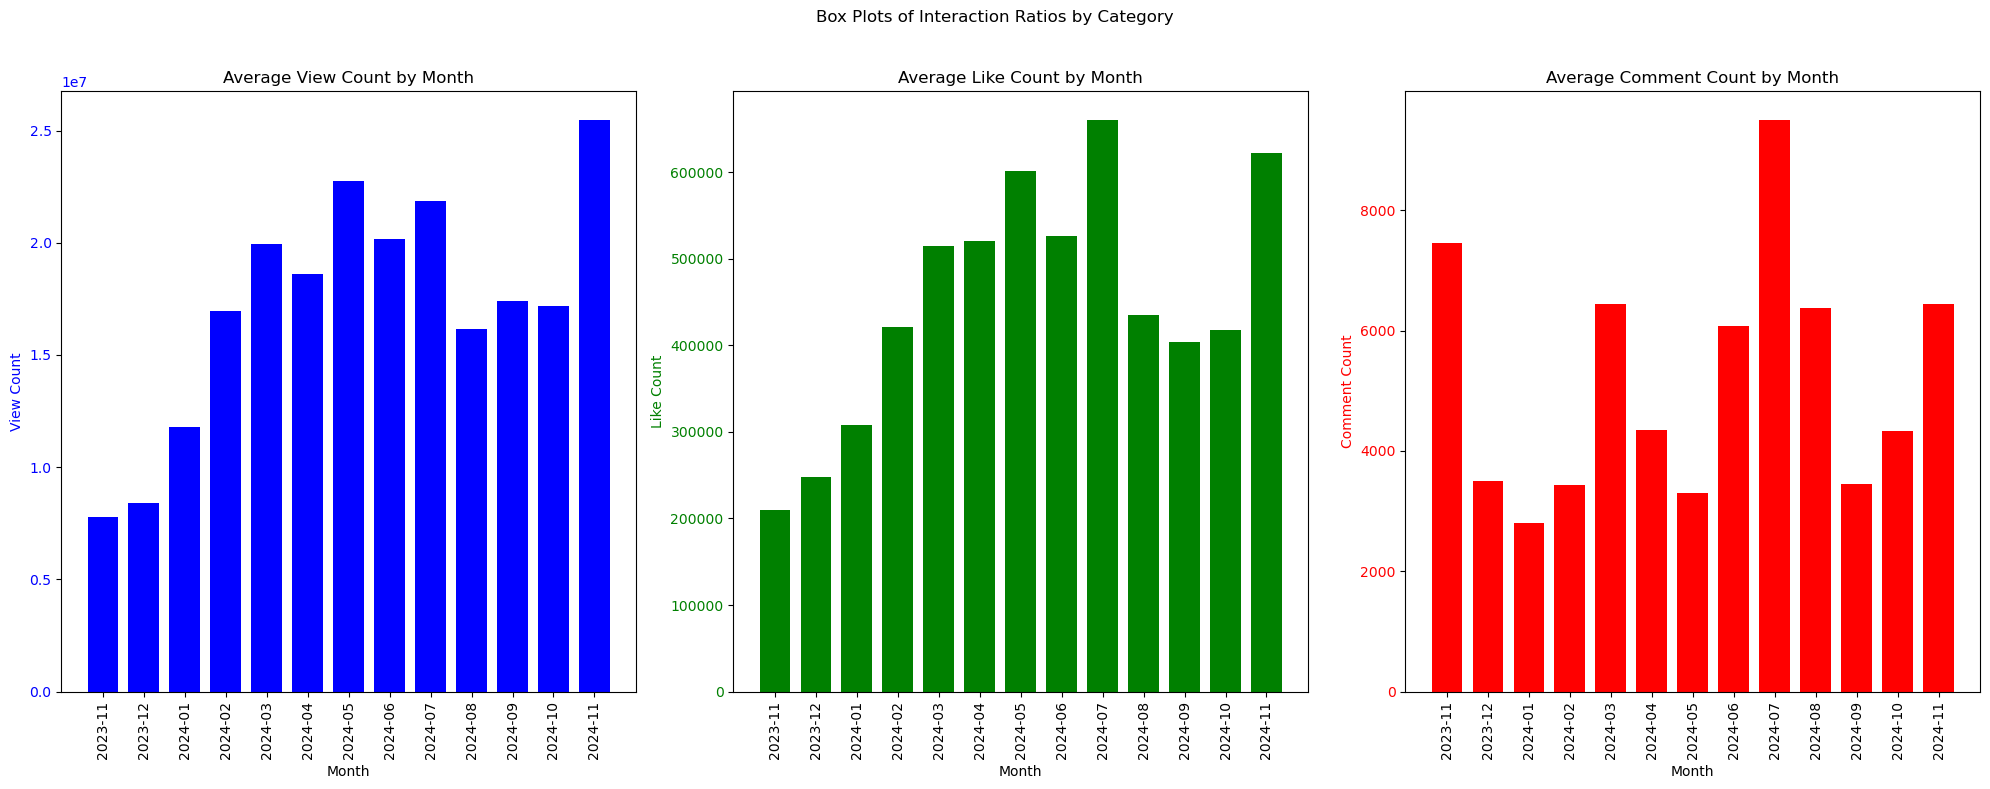

In [69]:
x = range(len(general_month['snapshot_date']))
width = 0.75
ig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

axes[0].bar(x, general_month['view_count'], width=width, label='View Count', color='b')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('View Count', color='b')
axes[0].set_xticks(x)
axes[0].set_xticklabels(general_month['snapshot_date'].astype(str), rotation=90)
axes[0].tick_params(axis='y', labelcolor='b')
axes[0].set_title('Average View Count by Month')

axes[1].bar(x, general_month['like_count'], width=width, label='Like Count', color='g')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Like Count', color='g')
axes[1].set_xticks(x)
axes[1].set_xticklabels(general_month['snapshot_date'].astype(str), rotation=90)
axes[1].tick_params(axis='y', labelcolor='g')
axes[1].set_title('Average Like Count by Month')

axes[2].bar(x, general_month['comment_count'], width=width, label='Comment Count', color='r')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Comment Count', color='r')
axes[2].set_xticks(x)
axes[2].set_xticklabels(general_month['snapshot_date'].astype(str), rotation=90)
axes[2].tick_params(axis='y', labelcolor='r')
axes[2].set_title('Average Comment Count by Month')

plt.suptitle('Box Plots of Interaction Ratios by Category')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()